In [1]:
from AD_vibration.data_loader import DataLoader, Sensor
from datetime import datetime, timedelta

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import  decimate , welch
import pandas as pd

In [16]:
Sxxs.shape

(14, 12501)

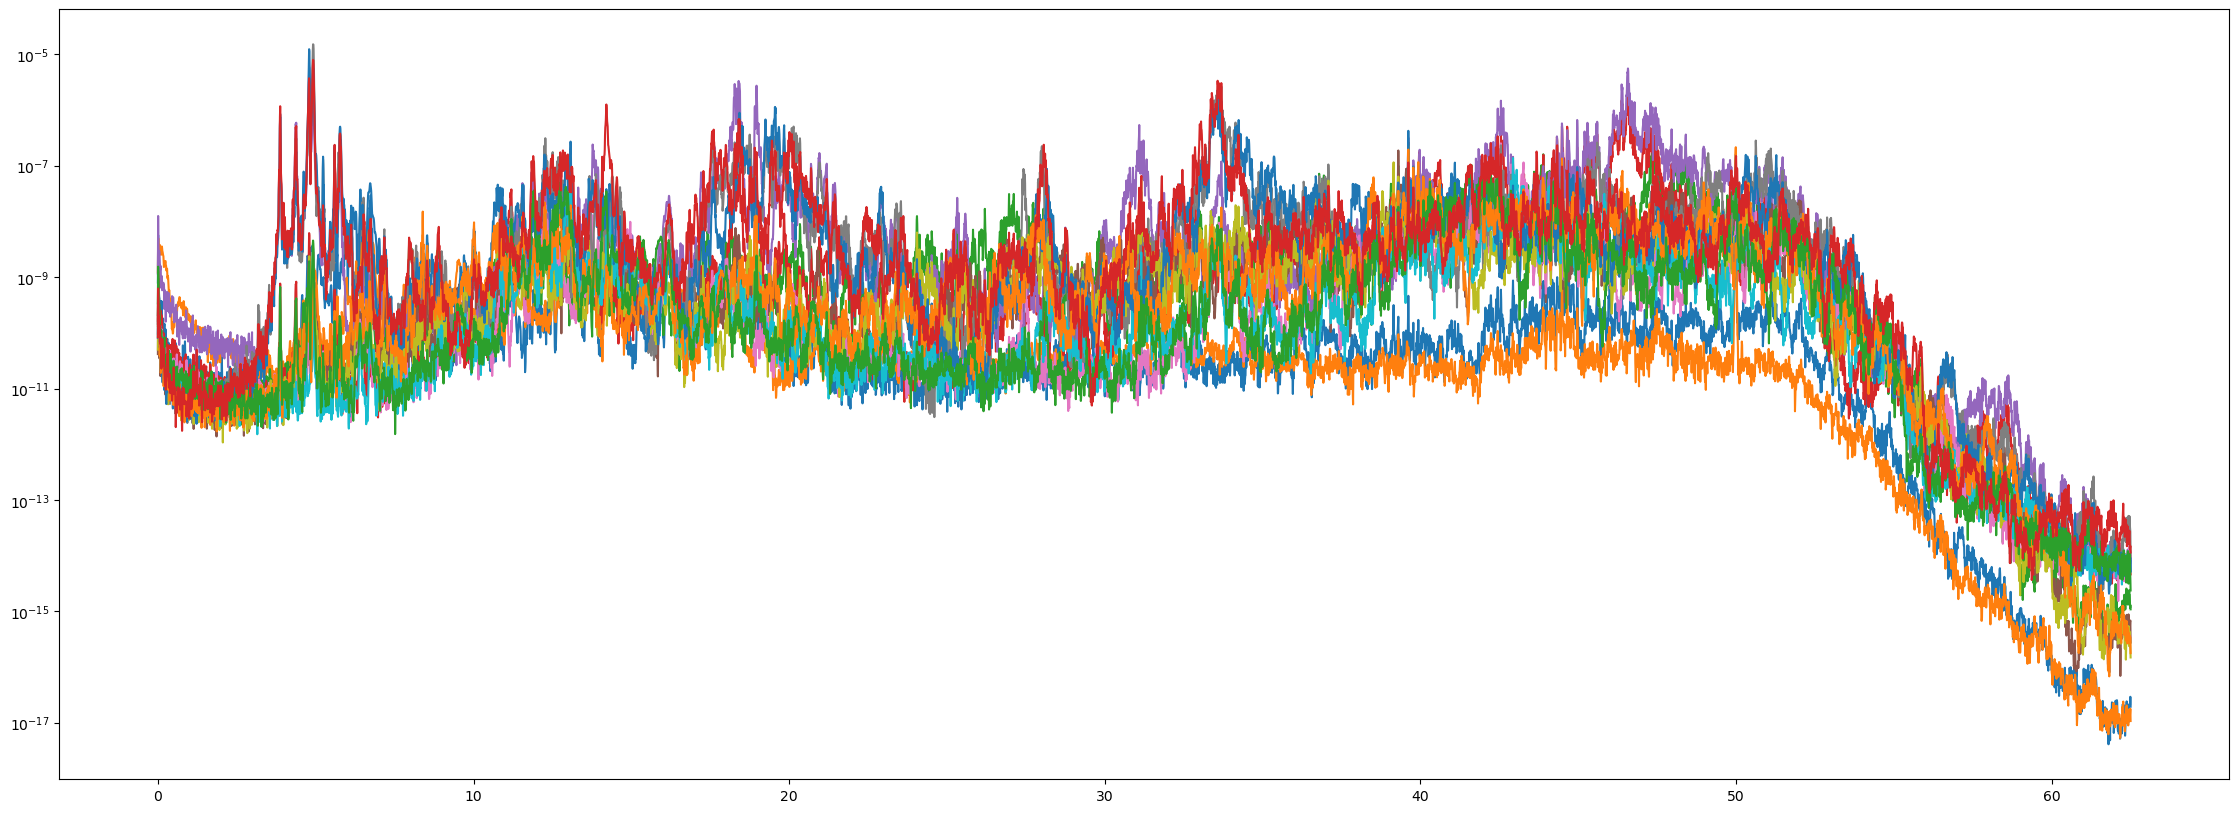

In [18]:
sensor = Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
data_loader = DataLoader(sensor=sensor)
dt= start = datetime(2022, 3, 29,18,10,0)
end = datetime(2022, 6, 26)
data = data_loader.get_data(start=dt,end=dt+timedelta(minutes=10))
f,Sxxs = compute_PSD(np.array(list(data.values())))
plt.figure(figsize=(28,10))
plt.plot(f,Sxxs.T)
plt.yscale('log')

In [128]:
sensor = Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
data_loader = DataLoader(sensor=sensor)
start = datetime(2022, 3, 29,18,10,0)
end = datetime(2022, 6, 26)
PSDs=[]
dts=[]
dt = start
while dt<end:
    try :
        data = data_loader.get_data(start=dt,end=dt+timedelta(minutes=20))
        if data is not None:
            f,Sxxs = compute_PSD(np.array(list(data.values())))
            PSDs.append(Sxxs)
            dts.append(dt)
    except:
        dt += timedelta(minutes=15)
        continue

    dt += timedelta(minutes=15)
    



Invalid data root: /media/yacine/Intenso/RawData
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_181000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_182500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_184000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_185500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_191000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_192500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_194000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_195500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_201000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/03/29/20220329_202500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/T

In [47]:
np.save('PSDs.npy',np.stack(PSDs))
pd.DataFrame(np.array(dts)).to_csv('datetimes.csv')

In [4]:
sensor = Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
data_loader = DataLoader(sensor=sensor)
start = datetime(2022, 3, 29,18,10,0)
dt = start
data = data_loader.get_data(start=dt,end=dt+timedelta(minutes=20))


In [7]:
sensor

array([-0.08632785, -0.0868953 , -0.08796436, ..., -0.08454044,
       -0.08495942, -0.08613013], dtype=float32)

In [19]:
from scipy import signal

import matplotlib.pyplot as plt



widths = np.arange(1, 1000)

cwtmatr = signal.cwt(data['ACC3_Z'], signal.ricker, widths)

/tmp/ipykernel_14486/2866998188.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(cwtmatr),


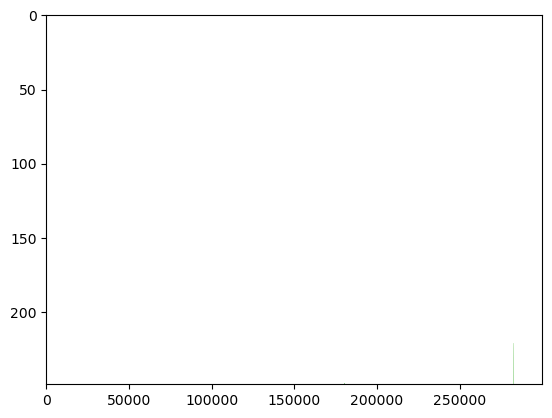

In [18]:
plt.imshow(np.log(cwtmatr),
            cmap='PRGn', aspect='auto',)

In [20]:
from kymatio.numpy import Scattering1D

In [104]:
30000/4

7500.0

In [107]:
len(sig)

75000

In [125]:
T = 75000
J = 16# number of scales 2**J = 2**12 = 4096, so we have 4096/250 = 16.384 seconds
Q = 36 # number of wavelets per octave
scattering = Scattering1D(J, T, Q)


In [130]:
data['ACC3_Z']

TypeError: 'NoneType' object is not subscriptable

In [118]:
meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

In [119]:
sig=data['ACC3_Z']
sig = sig - np.mean(sig)
sig=decimate(sig,4)

In [120]:
Sx = scattering(sig)

In [121]:
Sx = np.log(np.abs(Sx) + 1e-6)

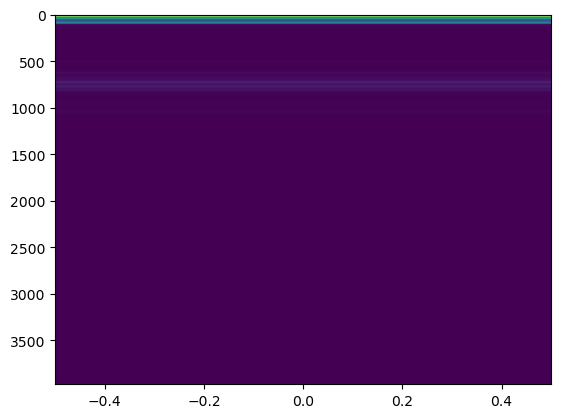

In [122]:
plt.imshow(Sx, aspect='auto',)

In [123]:
sig=data['ACC3_Z']
sig = sig - np.mean(sig)

(array([1.31692283e-08, 6.73685627e-09, 8.49497729e-11, ...,
        9.44385525e-11, 9.59631986e-11, 4.65616957e-11]),
 array([0.00000000e+00, 3.33333333e-02, 6.66666667e-02, ...,
        1.24933333e+02, 1.24966667e+02, 1.25000000e+02]))

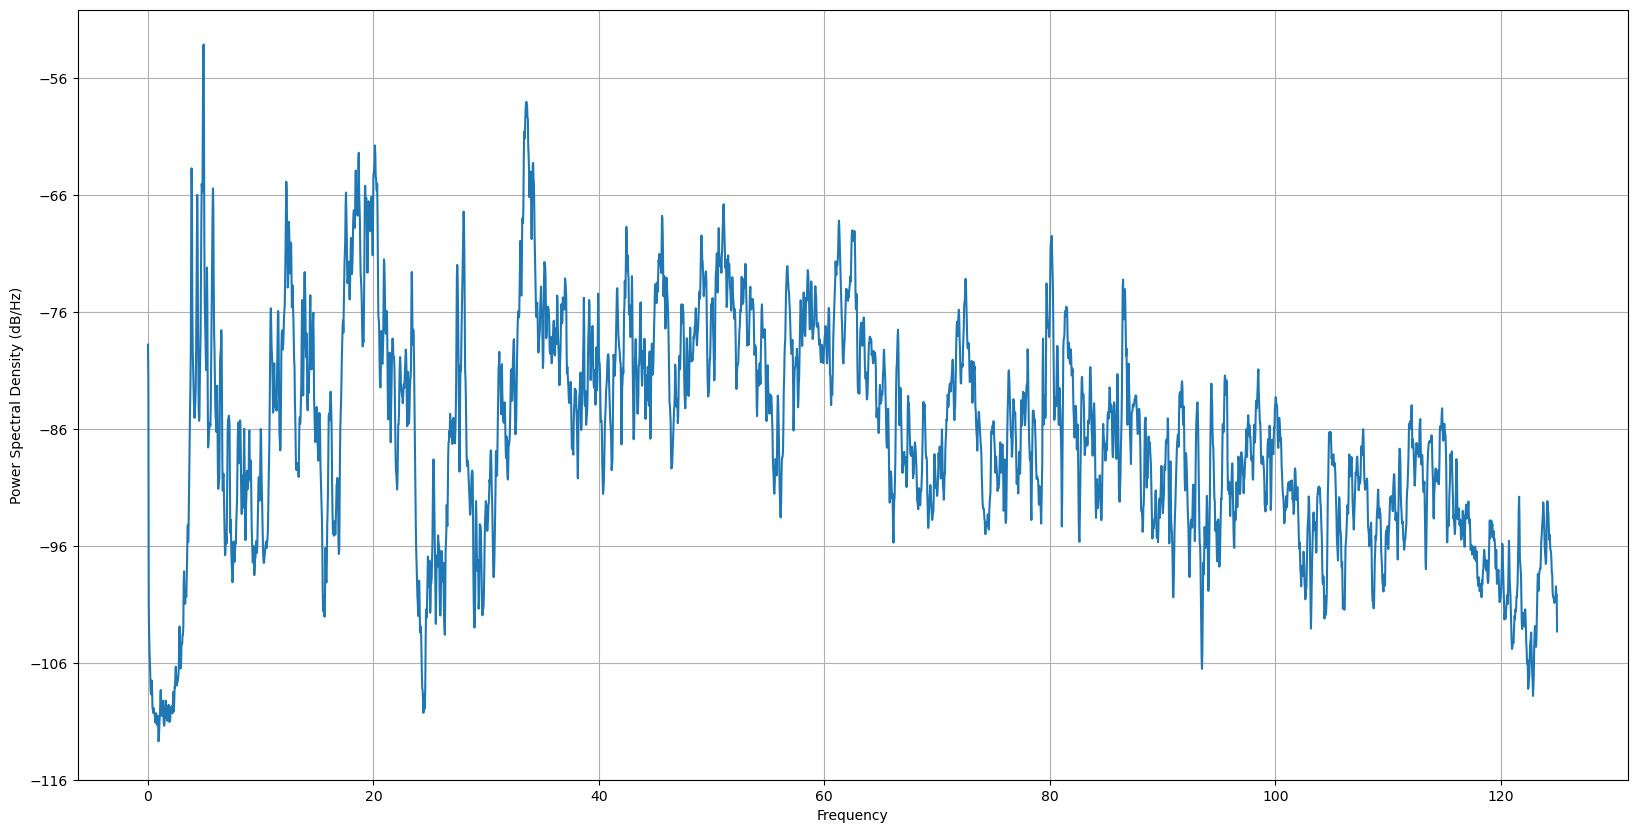

In [124]:
plt.figure(figsize=(20,10))
plt.psd(sig, Fs=250, NFFT=250*30, noverlap=250*20)

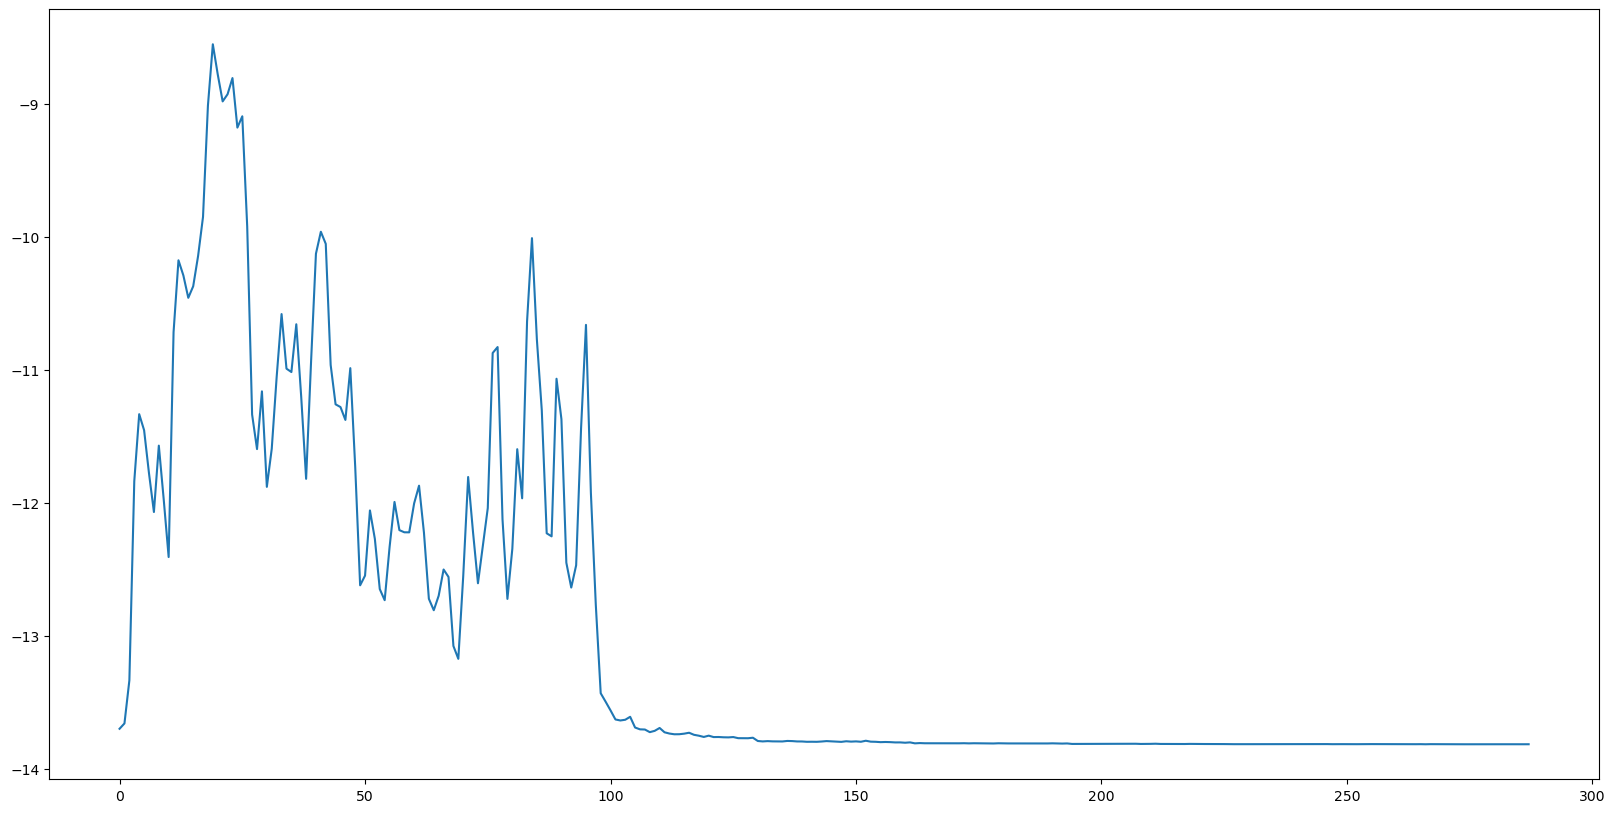

In [101]:
plt.figure(figsize=(20,10))
plt.plot(np.mean(Sx[order1],axis=-1))

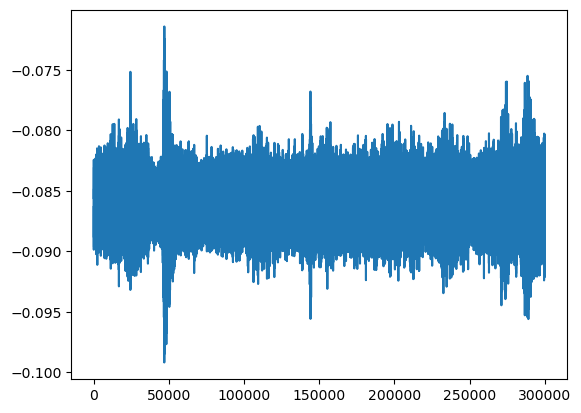

In [19]:
plt.plot(list(data.values())[7])

Text(0.5, 1.0, 'Zeroth-order scattering')

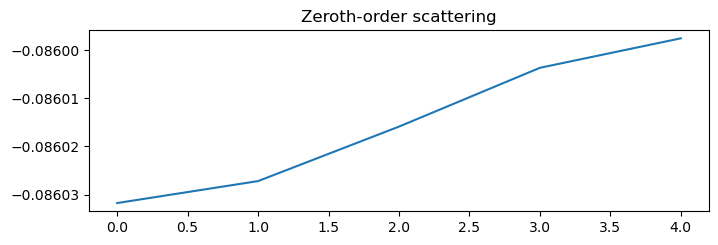

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(Sx[7][order0][0])
plt.title('Zeroth-order scattering')

Text(0.5, 1.0, 'First-order scattering')

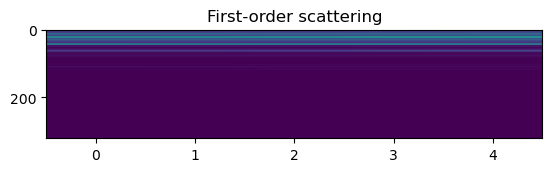

In [26]:
plt.subplot(3, 1, 2)
plt.imshow(Sx[7][order1], aspect='auto')
plt.title('First-order scattering')

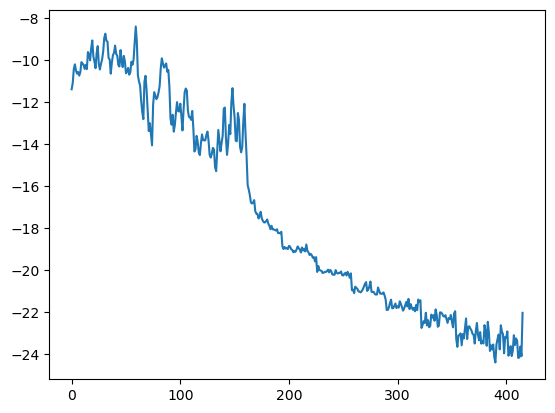

In [22]:
plt.plot(np.log(Sx[7][order1]).mean(axis=1))

Text(0.5, 1.0, 'First-order scattering')

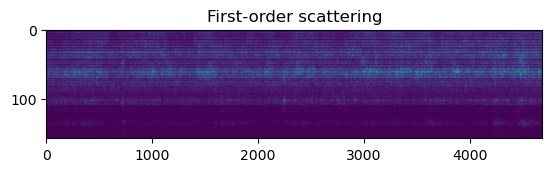

In [23]:
plt.subplot(3, 1, 2)
plt.imshow(Sx[7][order2], aspect='auto')
plt.title('First-order scattering')